# Supervised Learning - Artificial Intelligence

## Students' Dropout and Success

### Notebook by Henrique Pinho, João Lopes and Luís Marques

## Introduction

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

In this notebook, we will be using Supervised learning to predict if a student graduates or dropout.

## Required libraries

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import time
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## Checking the data


The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [108]:
student_data = pd.read_csv('data.csv', delimiter=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [109]:
student_data.isnull().any().sum()

0

No missing values were found.

In [110]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Next we split the data in the three targets.

In [111]:
enrolled = student_data[student_data.Target == "Enrolled"].drop(columns=['Target'])
graduated = student_data[student_data.Target == "Graduate"].drop(columns=['Target'])
dropout = student_data[student_data.Target == "Dropout"].drop(columns=['Target'])

<BarContainer object of 3 artists>

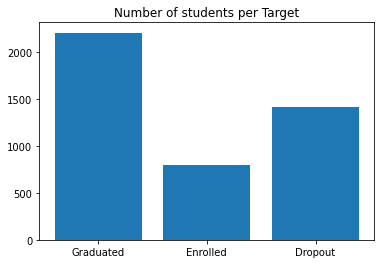

In [112]:
plt.title('Number of students per Target')
plt.bar(['Graduated', 'Enrolled', 'Dropout'], [len(graduated), len(enrolled), len(dropout)])

In this project we will focus only on the success or dropout of the students. All rows with target Enrolled will be left out.

In [113]:
student_data_clean = student_data.drop(student_data[student_data['Target'] == 'Enrolled'].index, inplace=False)
student_data_clean.describe()
#student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In this project our focus is in the students that graduate or dropout, so the students that are enrolled will be left out from this analysis.

In [114]:
graduate_data = student_data_clean[student_data_clean.Target == 'Graduate']
graduate_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,...,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,1.134903,15.018108,1.851064,8917.248076,0.909009,4.031236,134.082707,1.745134,19.311453,22.499774,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833
std,0.525526,16.627271,1.395516,1919.444837,0.287662,9.805602,13.342121,5.790637,15.590923,15.225751,...,0.589686,2.211709,2.297197,3.245912,2.268622,2.685608,0.522872,2.601474,1.371116,2.261081
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,7.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,0.600000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [115]:
dropout_data = student_data_clean[student_data_clean.Target == 'Dropout']
dropout_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.261084,23.712878,1.593244,8755.629838,0.854328,5.311049,131.114075,1.957072,21.035186,22.683322,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
std,0.721958,17.150593,1.215769,2278.779477,0.352901,10.309934,12.873354,7.838977,15.523817,15.357099,...,0.794591,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210,2.768259,1.404970,2.251768
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,7.000000,1.000000,9085.000000,1.000000,1.000000,122.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,22.000000,...,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,137.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000,13.900000,2.600000,1.740000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,8.000000,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000,16.200000,3.700000,3.510000


Since there is more graduated student then to balance the dataset a Stratified Sampling was applyed. 

In [116]:
graduate_data_1 = graduate_data.iloc[:500,:]
graduate_data_2 = graduate_data.iloc[500:1000,:]
graduate_data_3 = graduate_data.iloc[1000:1500,:]
graduate_data_4 = graduate_data.iloc[1500:,:]

graduate_data_1_sample = graduate_data_1.sample(n=350, axis=0)
graduate_data_2_sample = graduate_data_2.sample(n=350, axis=0)
graduate_data_3_sample = graduate_data_3.sample(n=350, axis=0)
graduate_data_4_sample = graduate_data_4.sample(n=350, axis=0)



graduate_sample = pd.concat([graduate_data_1_sample, graduate_data_2_sample, graduate_data_3_sample, graduate_data_4_sample])
graduate_sample.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1.125714,15.100000,1.828571,8900.709286,0.907857,3.690000,134.149786,1.852857,18.913571,21.864286,...,0.096429,0.635714,6.575714,8.102857,6.120714,12.690160,0.087143,11.569286,1.208000,0.184057
std,0.482632,16.705454,1.385325,1954.951083,0.289331,9.212427,13.341759,6.066093,15.610487,15.520288,...,0.625856,2.183212,2.309500,3.314705,2.277183,2.736158,0.557853,2.618625,1.340881,2.243069
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,7.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,1.400000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [117]:
student_data_clean = pd.concat([graduate_sample, dropout_data])
student_data_clean.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.00000,2821.000000
mean,1.193903,19.438497,1.710032,8827.629564,0.880893,4.506558,132.620631,1.905353,19.982276,22.276852,...,0.144630,0.542006,6.175115,7.634881,4.014888,9.269474,0.163063,11.593017,1.24626,0.015353
std,0.618548,17.467483,1.307752,2125.112905,0.323971,9.812482,13.193210,7.014315,15.600249,15.440997,...,0.717312,1.947746,2.245523,4.165628,3.206010,5.839400,0.811048,2.694663,1.37382,2.253290
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.80000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,9.400000,0.30000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,11.100000,1.40000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.60000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.70000,3.510000


In [118]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

#sb.pairplot(student_data_clean.sample(100), hue='Target')
;

''

/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
/home/luis/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


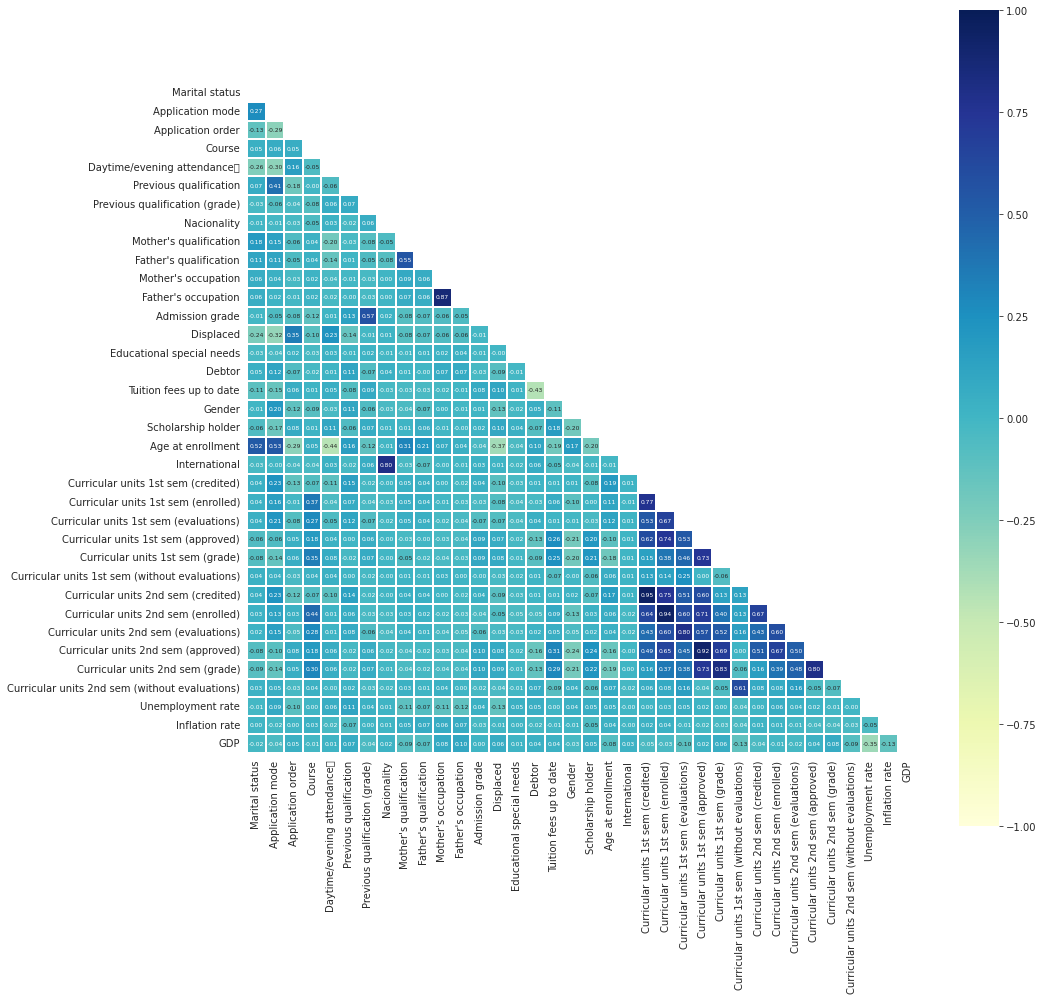

In [119]:
student_data_corr = student_data_clean.corr()
mask = np.zeros_like(student_data_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sb.axes_style("white"):
    ax = sb.heatmap(student_data_corr, linewidths=0.1, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 6}, vmax=1, vmin=-1)
    plt.show()

From this correlation matrix we can exctract features that are strongly correlated with eachother. Values with an absolute value of more than 0.9 which is our criteria for correlated features.

In [120]:
student_data_corr = student_data_clean.corr().abs()

upper = student_data_corr.where(np.triu(np.ones(student_data_corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

old_n_columns = len(student_data_clean.columns)

student_data_clean.drop(to_drop, axis=1, inplace=True)

print('Dropped ' + str(old_n_columns-len(student_data_clean.columns)) + ' columns')
student_data_clean.describe()

Dropped 3 columns


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.00000,2821.000000
mean,1.193903,19.438497,1.710032,8827.629564,0.880893,4.506558,132.620631,1.905353,19.982276,22.276852,...,7.970578,4.360510,9.920779,0.144630,7.634881,9.269474,0.163063,11.593017,1.24626,0.015353
std,0.618548,17.467483,1.307752,2125.112905,0.323971,9.812482,13.193210,7.014315,15.600249,15.440997,...,4.378889,3.262421,5.411826,0.717312,4.165628,5.839400,0.811048,2.694663,1.37382,2.253290
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.80000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,6.000000,1.000000,10.500000,0.000000,6.000000,0.000000,0.000000,9.400000,0.30000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,8.000000,5.000000,12.166667,0.000000,8.000000,12.000000,0.000000,11.100000,1.40000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,10.000000,6.000000,13.333333,0.000000,10.000000,13.333333,0.000000,13.900000,2.60000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,45.000000,21.000000,18.000000,12.000000,33.000000,18.571429,12.000000,16.200000,3.70000,3.510000


Auxiliar function to retrieve the inputs and labels from dataset provided

In [121]:
def get_inputs_labels(dataset, scaler=None):
    all_inputs = dataset.drop('Target', axis=1)
    all_labels = dataset['Target']
    
    if scaler != None:
        scaler = scaler.fit(all_inputs)
        all_inputs = scaler.transform(all_inputs)

    return all_inputs, all_labels
        
all_inputs, all_labels = get_inputs_labels(student_data_clean)

Auxiliar function to perform parameter tunning with cross validation

In [122]:
def tune_model(dataset, model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None, oversample=False): 
    all_inputs, all_labels = get_inputs_labels(dataset, scaler)
    
    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)


    grid_search = GridSearchCV(
        model_instance,
        param_grid=parameter_grid,
        cv=cross_validation,
        scoring="f1_weighted"
    )

    grid_search.fit(all_inputs, all_labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_
    return grid_search

### Time Measure

In [123]:
def measure_time(dataset, model_instance, params, scaler=None, oversample=False):
    all_inputs, all_labels = get_inputs_labels(dataset, scaler)

    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)
    model_instance.set_params(**params)

    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
    
    start = time.time()
    model_instance.fit(training_inputs, training_classes)
    end = time.time()
    return end - start

### Decision Tree

In [124]:
parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 9),
    'max_features': range(1, 9)
}

dt_original = tune_model(student_data, DecisionTreeClassifier(), parameter_grid)

KeyboardInterrupt: 

In [ ]:
dt = tune_model(student_data_clean, DecisionTreeClassifier(), parameter_grid)

Best score: 0.8503933178043749
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'splitter': 'best'}


In [ ]:
parameter_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': range(1, 7),
    'model__max_features': range(1, 7)
}

dt_os_fs = tune_model(student_data_clean, DecisionTreeClassifier(), parameter_grid, oversample=True)

Best score: 0.8468624654108086
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 6, 'model__max_features': 6, 'model__splitter': 'best'}


### SVM

Text(0.5, 1.0, 'Average score: 0.49946745858707364')

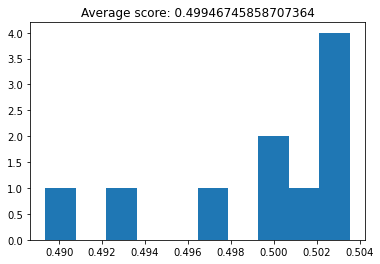

In [ ]:
X, y = get_inputs_labels(student_data_clean)

# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.8773525800065156')

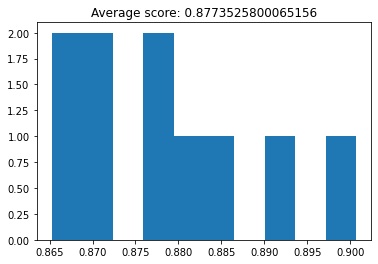

In [ ]:
# Standardizing the data:
standardized_X, y = get_inputs_labels(student_data_clean, scaler = StandardScaler())

svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

By comparing both histograms, it can be easily concluded that the standardization is really necessary and produces better and more consistent results.

Still the cross validation scores vary a lot based on the training data chosen. Therefore we should do some parameter tuning to see what the best parameters are for our dataset that don't overfit the data. This can be achieved by a GridSearch. This will be addressed below.

In [ ]:
parameter_grid = {
    'C': [1, 10, 50], 
    'gamma': [0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf']
}

# No oversampling / No feature selection
svc_original = tune_model(student_data, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.7572102795860735
Best parameters: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# No oversampling / Feature selection
svc = tune_model(student_data_clean, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.8845408930333291
Best parameters: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
parameter_grid = {
    'model__C': [1, 10, 50], 
    'model__gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'model__kernel': ['linear', 'rbf', 'sigmoid']
}

# Oversampling / Feature Selection
svc_os_fs = tune_model(student_data_clean, SVC(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8841611903246275
Best parameters: {'model__C': 50, 'model__gamma': 0.001, 'model__kernel': 'rbf'}


### K-nearest neighbours (KNN)

''

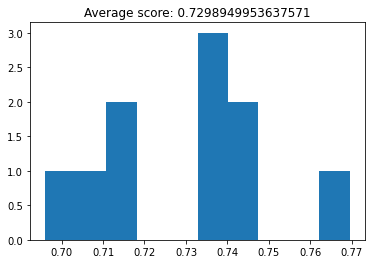

In [ ]:
# Without standardizing the data

X, y = get_inputs_labels(student_data_clean)

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

''

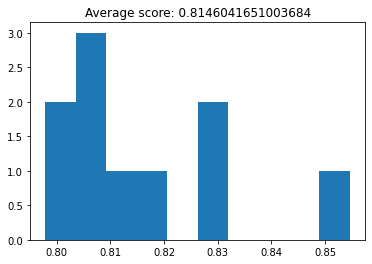

In [ ]:
# Standardizing the data
standardized_X, y = get_inputs_labels(student_data_clean, scaler=StandardScaler())

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
parameter_grid =  {
    'n_neighbors':[4,5,6,7,10,15],
    'leaf_size':[5, 10, 15, 20, 50, 100],
    'n_jobs':[-1],
    'algorithm':['auto']
}

# No oversampling / No feature selection
knn = neighbors.KNeighborsClassifier()
knn_original = tune_model(student_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.6880458285094058
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 7}


In [ ]:
# No oversampling / Feature selection
knn = neighbors.KNeighborsClassifier()
knn = tune_model(student_data_clean, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.821113117633538
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 7}


In [ ]:
parameter_grid = {
    'model__n_neighbors':[4,5,6,7,10,15],
    'model__leaf_size':[5, 10, 15, 20, 50, 100],
    'model__n_jobs':[-1],
    'model__algorithm':['auto']
}

# Oversampling / Feature Selection
knn_os_fs = tune_model(student_data_clean, neighbors.KNeighborsClassifier(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.821065928407311
Best parameters: {'model__algorithm': 'auto', 'model__leaf_size': 20, 'model__n_jobs': -1, 'model__n_neighbors': 7}


### Naive Bayes

In [ ]:
parameter_grid = {}

# No oversampling / No feature selection
nb_original = tune_model(student_data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.6642678607484849
Best parameters: {}


In [ ]:
# No oversampling / Feature selection
nb = tune_model(student_data_clean, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8095112420701225
Best parameters: {}


In [ ]:
parameter_grid = {}

# Oversampling / Feature Selection
nb_os_fs = tune_model(student_data_clean, GaussianNB(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8098950314943065
Best parameters: {}


### Random Forest Classifier

In [ ]:
parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1], #Use all cores
    'criterion': ['gini', 'entropy']
}

# No oversampling / No feature selection
rfc_original = tune_model(student_data, RandomForestClassifier(), parameter_grid)

Best score: 0.7604128807114301
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200, 'n_jobs': -1}


In [ ]:
# No oversampling / Feature selection
rfc = tune_model(student_data_clean, RandomForestClassifier(), parameter_grid)

Best score: 0.8825183424347575
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100, 'n_jobs': -1}


In [ ]:
parameter_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [5, 10, 15],
    'model__n_jobs': [-1], #Use all cores
    'model__criterion': ['gini', 'entropy']
}

# Oversampling / Feature Selection
rfc_os_fs = tune_model(student_data_clean, RandomForestClassifier(), parameter_grid, oversample=True)

Best score: 0.8817665650855122
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__n_estimators': 200, 'model__n_jobs': -1}


### Comparing Models

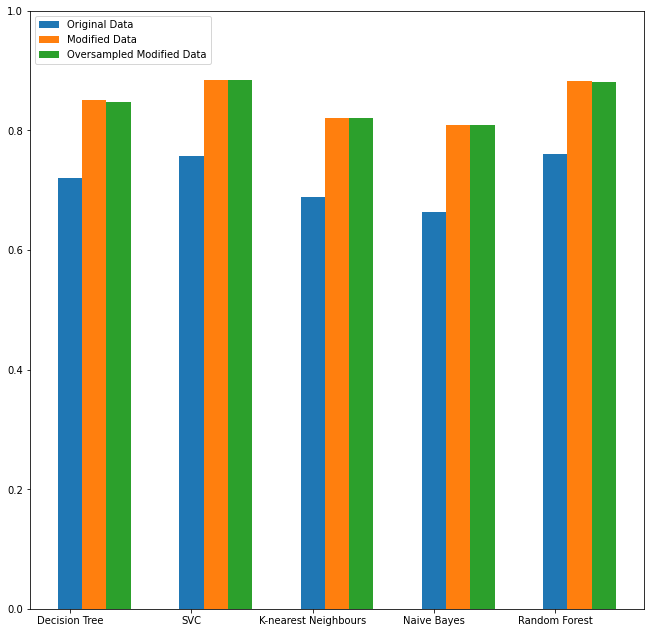

In [ ]:
scores = {
    "Decision Tree" : [dt_original, dt, dt_os_fs],
    "SVC" : [svc_original, svc, svc_os_fs],
    "K-nearest Neighbours" : [knn_original, knn, knn_os_fs],
    "Naive Bayes" : [nb_original, nb, nb_os_fs],
    "Random Forest" : [rfc_original, rfc, rfc_os_fs]
}

labels = ["Original Data","Modified Data", "Oversampled Modified Data"]

ind = np.arange(5)

plt.figure(figsize=(11,11))
plt.bar(ind, [i[0].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2].best_score_ for i in scores.values()], 0.2)
plt.xticks(ind, scores.keys())
plt.legend(labels,loc=2)
plt.ylim(0, 1)
plt.show()

### Analysing Times

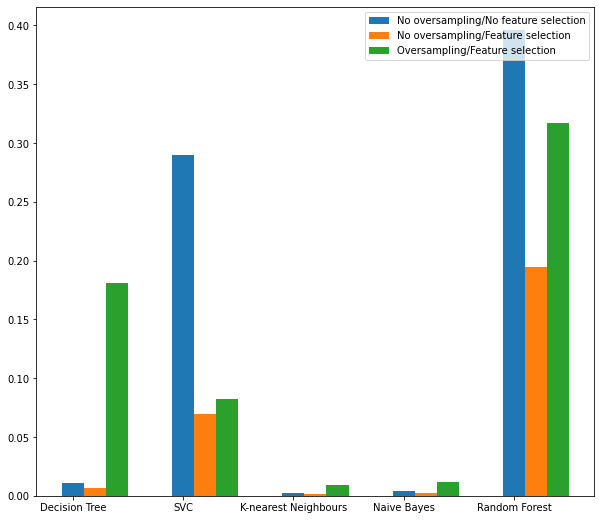

In [ ]:
times = {
    "Decision Tree" : [
        measure_time(student_data, DecisionTreeClassifier(), dt_original.best_params_),
        measure_time(student_data_clean, DecisionTreeClassifier(), dt.best_params_),
        measure_time(student_data_clean, DecisionTreeClassifier(), dt_os_fs.best_params_, oversample=True)
    ],
    "SVC" : [
        measure_time(student_data, SVC(), svc_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, SVC(), svc.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, SVC(), svc_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "K-nearest Neighbours" : [
        measure_time(student_data, neighbors.KNeighborsClassifier(), knn_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, neighbors.KNeighborsClassifier(), knn.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, neighbors.KNeighborsClassifier(), knn_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Naive Bayes" : [
        measure_time(student_data, GaussianNB(), nb_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, GaussianNB(), nb.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, GaussianNB(), nb_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Random Forest" : [
        measure_time(student_data, RandomForestClassifier(), rfc_original.best_params_),
        measure_time(student_data_clean, RandomForestClassifier(), rfc.best_params_),
        measure_time(student_data_clean, RandomForestClassifier(), rfc_os_fs.best_params_, oversample=True)
    ]
}

labels = ["No oversampling/No feature selection","No oversampling/Feature selection", "Oversampling/Feature selection"]

ind = np.arange(5)

plt.figure(figsize=(10,9))
plt.bar(ind, [i[0] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2] for i in times.values()], 0.2)
plt.xticks(ind, times.keys())
plt.legend(labels,loc=1)

# plt.ylim(0.7, 1)
plt.show()

### Conclusion

The proposed work was to test and compare different Supervised Machine Learning models for classification of the **Students' Success or Dropout** dataset. The tested models were **Decision Tree**, **Support Vector Machines**, **K-nearest Neighbours**, **Naive Bayes** and **Random Forest**.

After some exploratory data analysis we decided to drop some features based on their correlation with each other. This proved to be only effective in the **Naive Bayes** and **Random Forest Classifiers**.

To evaluate each model and choose the best parameters for each one, we used SKLearn's GridSearchCV to test different set of parameters. To score the models we used f1 wighted score. We also tried combining oversampling with and without feature selection. Looking at the benchmarks we can conclude that oversampling does not improve the scores on our models while increasing significantly the training time.

In terms of scoring, it can be concluded that the best models for our classification problem is the **Support Vector Machine**, followed closely by the **K-nearest Neighbors**. However when we take a look at the time needed to train each model, the **Support Vector Machine** takes much longer than **K-nearest Neighbours**, making **K-nearest neighbours** the best model overall. This appears to be related to the fact that **K-nearest Neighbours** can be trained with the flag n_jobs=-1 which makes it use all the cores in the CPU while **Support Vector Machine** does not support this option.